## Cryptocurrency (Bitcoin) Sentiment Analysis

####  Business Problem:
An investor is interested in making informed investment decisions regarding Bitcoin (BTC) within the context of the dynamic cryptocurrency market. This investor recognizes the necessity of considering both sentimental analysis, which involves assessing public sentiment, and price trend analysis when evaluating BTC as an investment. 

The objective is to develop a comprehensive investment strategy that leverages these two key factors to maximize returns and minimize risks in the highly volatile cryptocurrency market.

### Business Understanding:

**Market Expansion:** The cryptocurrency market has witnessed explosive growth, with the number of owners increasing from 5 million in 2016 to over 300 million in 2021. Similarly, the NFT marketplace has seen a surge in users, growing from 670,000 in 2020 to more than 44 million in 2022. This indicates a growing interest and participation in the cryptocurrency space.

**Market Volatility:** Cryptocurrencies are known for their extreme price fluctuations. For example, in 2022, Bitcoin and Dogecoin both experienced significant losses, with Bitcoin losing more than 60% of its value and Dogecoin losing 55%. This volatility can present both opportunities and risks for investors.

**Sentiment Analysis:** Public sentiment plays a crucial role in the cryptocurrency market. The sentiment of investors and the general public can impact the prices of cryptocurrencies. Understanding and measuring sentiment accurately is essential for making informed investment decisions.

**Holistic Analysis:** To make well-rounded investment decisions, it's vital to combine sentiment analysis with technical and fundamental analysis. Technical analysis involves examining historical price charts and patterns, while fundamental analysis assesses the underlying factors driving the cryptocurrency's value, such as technology, adoption, and market trends.

##### Business Questions:
To guide our investment strategy in Bitcoin, we need to address the following business questions:
- How can we accurately measure and analyze cryptocurrency market sentiment, including public opinions, attitudes, moods, and outlooks, to gauge the potential impact on Bitcoin's price fluctuations?
- How can we integrate sentiment analysis with technical and fundamental analysis to create a comprehensive framework for evaluating Bitcoin's future momentum and investment potential?
- What are the key indicators and data sources we should use for sentiment analysis, and how can we ensure the accuracy and reliability of sentiment data?
- How can we develop a risk management strategy to mitigate the effects of market volatility, considering the past performance of Bitcoin and other cryptocurrencies?
- What are the best practices and tools for monitoring and staying updated on cryptocurrency market sentiment and trends in real-time?
- Correlation Analysis: How strongly do sentiment changes correlate with BTC price movements, aiding price prediction?
- Investment Timing: How can insights from analysis guide optimal buying, holding, or selling decisions?
- Performance Metrics: What metrics should be established to measure the effectiveness of the analysis-based investment strategy?

#### Main Objective

The aim of the project is to utilize sentiment-driven data to inform the development and enhancement of cryptocurrency products and services, ensuring they align with user preferences and market sentiment. Our goal is to optimize investment strategies, manage risks effectively, enhance user experiences, and remain competitive in the dynamic cryptocurrency landscape.

#### Specific Objectives
- **Investment Support:** Develop a sentiment analysis model for timely investment guidance on Bitcoin.
- **Risk Assessment:** Analyze sentiment data to quantify Bitcoin-related market risks.
- **Market Strategies:** Create sentiment-driven entry and exit strategies for cryptocurrency investments.
- **Product Insights:** Utilize sentiment analysis for user feedback and product enhancement.
- **Competitive Analysis:** Understand Bitcoin's perception compared to other assets for portfolio decisions.
- **User Engagement:** Enhance user engagement based on sentiment insights.
- **Regulatory Monitoring:** Keep investors informed about regulatory sentiment shifts in the cryptocurrency market.

### Metric of Success

- **ROC-AUC score**

For gauging the overall predictive power of our final model.


- **F1-score**

**Minimizing False Positives:**

Minimizing false positives means you are cautious about making an investment decision unless you are highly confident that a trading signal is accurate. This approach minimizes the risk of entering trades that don't perform as expected.

**Minimizing False Negatives:**

Minimizing false negatives means you are more open to taking trading positions, even if there's a chance of some signals being inaccurate. This approach can help you capture more potential profit opportunities.

### Methodology

- Data cleaning/preparation will involve tasks such tokenization, lemmatization, removing stopwords.
- Feature engineering will involve tasks such vectorization using Bag of Words and Word Embeddings techniques.
- Modeling will involve building algorithms such as Naive Bayes Classifier, Random Forest, XGBoost and Neural Networks and Pretrained networks. RNN, LSTM, Hugging face.

### Data understanding
- The data was originally scraped from twitter, but for our use case it was obtained from [Data.world](https://data.world/mercal/btc-tweets-sentiment).
- Has 50859 rows × 10 columns.
- A multiclass-label classification task. Classify the tweets as either;
          positive
          neutral
          negative
- Columns of interest are the tweet, sentiment and sent_score columns.

###### Columns in our dataset
   * File: reddit-r-bitcoin-data-for-jun-2022-posts.csv
     Column_name  	Description
    * type	            -The type of post. (String)
    * subreddit.name	-The name of the subreddit. (String)
    * subreddit.nsfw	-Whether the subreddit is NSFW. (Boolean)
    * created_utc	    -The time the post was created. (Timestamp)
    * permalink	        -The permalink of the post. (String)
    * domain	        -The domain of the post. (String)
    * url	            -The URL of the post. (String)
    * selftext	        -The selftext of the post. (String)
    * title	            -The title of the post. (String)
    * score	            -The score of the post. (Integer)



* File: reddit-r-bitcoin-data-for-jun-2022-comments.csv
    * type	    - The type of post. (String)
    * subreddit.name	- The name of the subreddit. (String)
    * subreddit.nsfw	- Whether the subreddit is NSFW. (Boolean)
    * created_utc	- The time the post was created. (Timestamp)
    * permalink	    - The permalink of the post. (String)
    * score	        - The score of the post. (Integer)
    * body	        - The body text of the post. (String)
    * sentiment	    - The sentiment of the post. (String)

In [77]:
# importing necessary libraries

import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

# Set the maximum column width to a high value
#pd.set_option('display.max_colwidth', None)

In [78]:
# Load the comments dataset
df = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-comments.csv")
df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5...,I still use cash daily but that’s because my g...,0.9050,3
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1


In [79]:
# check the shape of the dataset
df.shape

(170032, 10)

In [80]:
df.sample(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
129400,comment,ibx1cv4,2s3qj,bitcoin,False,1654905232,https://old.reddit.com/r/Bitcoin/comments/v9b3...,This is not new. This was reported on last ye...,0.7237,1
47784,comment,id0giyc,2s3qj,bitcoin,False,1655690210,https://old.reddit.com/r/Bitcoin/comments/vfoi...,Wallet address doesn't give them any control t...,0.0000,2
153247,comment,ib8eyoc,2s3qj,bitcoin,False,1654418201,https://old.reddit.com/r/Bitcoin/comments/v4ho...,"You know what I think You're a troll, that's w...",0.0000,1
83122,comment,iclbesr,2s3qj,bitcoin,False,1655393120,https://old.reddit.com/r/Bitcoin/comments/vcvy...,"Those have spent time in the market, knows the...",0.0000,0
55510,comment,icwmmca,2s3qj,bitcoin,False,1655608912,https://old.reddit.com/r/Bitcoin/comments/vfll...,Well he's not wrong,0.5653,2


In [81]:
#Load the posts dataset

df1 = pd.read_csv("Data/reddit-r-bitcoin-data-for-jun-2022-posts.csv")
df1.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,vomm4k,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,post,vomdf8,2s3qj,bitcoin,False,1656632554,https://old.reddit.com/r/Bitcoin/comments/vomd...,self.bitcoin,NaN,I was thinking.. is it possible for the govern...,Bitcoin and the internet,0
2,post,vomcjb,2s3qj,bitcoin,False,1656632478,https://old.reddit.com/r/Bitcoin/comments/vomc...,bitcointalk.org,https://bitcointalk.org/index.php?topic=990345.0,NaN,Learn how to sign a message with your Bitcoin ...,6
3,post,vom29i,2s3qj,bitcoin,False,1656631661,https://old.reddit.com/r/Bitcoin/comments/vom2...,npr.org,https://www.npr.org/2022/06/21/1105815143/cryp...,NaN,Cryptocurrency tech's security weaknesses coul...,1
4,post,vom1cw,2s3qj,bitcoin,False,1656631586,https://old.reddit.com/r/Bitcoin/comments/vom1...,self.bitcoin,NaN,How long is a reasonable amount of time for BT...,Deciphering BTC Hash,0


In [82]:
df.head(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8
1,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0
2,comment,iedz77w,2s3qj,bitcoin,False,1656633568,https://old.reddit.com/r/Bitcoin/comments/voj5...,I still use cash daily but that’s because my g...,0.9050,3
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1


In [83]:
df.tail(5)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
170027,comment,iaq4x7s,2s3qj,bitcoin,False,1654041708,https://old.reddit.com/r/Bitcoin/comments/v22o...,The USD will go hyper in the next 24 months. D...,-0.8807,12
170028,comment,iaq4wtz,2s3qj,bitcoin,False,1654041703,https://old.reddit.com/r/Bitcoin/comments/v1yg...,How profitable is bitcoin mining right now? Do...,0.6322,2
170029,comment,iaq4svw,2s3qj,bitcoin,False,1654041650,https://old.reddit.com/r/Bitcoin/comments/v23o...,Why would I care about Steven Seagal's or any ...,0.2363,1
170030,comment,iaq4qu6,2s3qj,bitcoin,False,1654041622,https://old.reddit.com/r/Bitcoin/comments/v1h3...,"Hahaha, seeing this technology is amazing, it ...",0.8126,2
170031,comment,iaq4plr,2s3qj,bitcoin,False,1654041605,https://old.reddit.com/r/Bitcoin/comments/v23p...,tldr; Coinbase is reportedly tracking what its...,0.7096,3


### Data Preprocessing and Cleaning

In [84]:
# Assuming df1 is your DataFrame
df1 = df1.rename(columns={'id': 'post_identifier'})

In [85]:
# Assuming df is your DataFrame
df['post_identifier'] = df['permalink'].apply(lambda x: x.split('/')[-4])

In [86]:
df1.duplicated().sum()

0

In [87]:
df['post_identifier'].unique()

array(['vomm4k', 'vo066b', 'voj5kf', ..., 'v17kxu', 'v22gpv', 'v1tbjl'],
      dtype=object)

In [88]:
# Assuming df is your DataFrame
post_identifier_counts = df['post_identifier'].value_counts()
post_identifier_counts 

veyv4n    3596
vb4gj5    2881
vf0lo5    2519
vd5gjn    1441
vcms2n    1423
          ... 
vmku9c       1
vbf6ez       1
v945c3       1
vg3xq4       1
rz3ubb       1
Name: post_identifier, Length: 5577, dtype: int64

In [89]:
#Merge the dataset based on post_identifier
merged_df = df.merge(df1, on='post_identifier', how='inner')
merged_df.head()

,type_x,id,subreddit.id_x,subreddit.name_x,subreddit.nsfw_x,created_utc_x,permalink_x,body,sentiment,score_x,...,subreddit.id_y,subreddit.name_y,subreddit.nsfw_y,created_utc_y,permalink_y,domain,url,selftext,title,score_y
0,comment,iedz93k,2s3qj,bitcoin,False,1656633593,https://old.reddit.com/r/Bitcoin/comments/vomm...,$28 fee. Godamn.,0.0000,8,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
1,comment,iedypmt,2s3qj,bitcoin,False,1656633339,https://old.reddit.com/r/Bitcoin/comments/vomm...,luhdat,NaN,0,...,2s3qj,bitcoin,False,1656633285,https://old.reddit.com/r/Bitcoin/comments/vomm...,i.redd.it,https://i.redd.it/gdltk4ua1w891.jpg,NaN,I will buy 0.1 every day we are under 20k. Sel...,1071
2,comment,iedz79o,2s3qj,bitcoin,False,1656633569,https://old.reddit.com/r/Bitcoin/comments/vo06...,[deleted],NaN,0,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
3,comment,iedz6wb,2s3qj,bitcoin,False,1656633564,https://old.reddit.com/r/Bitcoin/comments/vo06...,[removed],NaN,1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60
4,comment,iedz64u,2s3qj,bitcoin,False,1656633554,https://old.reddit.com/r/Bitcoin/comments/vo06...,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,...,2s3qj,bitcoin,False,1656565639,https://old.reddit.com/r/Bitcoin/comments/vo06...,self.bitcoin,NaN,Please utilize this sticky thread for all gene...,"Daily Discussion, June 30, 2022",60


In [90]:
#check the shape of the merged dataset

merged_df.shape

(168030, 22)

In [91]:
#Check for percentage of null values

merged_df.isnull().sum() /len(merged_df)* 100

type_x               0.000000
id                   0.000000
subreddit.id_x       0.000000
subreddit.name_x     0.000000
subreddit.nsfw_x     0.000000
created_utc_x        0.000000
permalink_x          0.000000
body                 0.000000
sentiment           18.559186
score_x              0.000000
post_identifier      0.000000
type_y               0.000000
subreddit.id_y       0.000000
subreddit.name_y     0.000000
subreddit.nsfw_y     0.000000
created_utc_y        0.000000
permalink_y          0.000000
domain               0.000000
url                 59.527465
selftext            40.472535
title                0.000000
score_y              0.000000
dtype: float64

In [92]:
# Create a new DataFrame with relevant columns
relevant_columns = ['id', 'created_utc_x', 'created_utc_y','body','sentiment','score_x','score_y',
                   'post_identifier','title']
new_df = merged_df[relevant_columns].copy()

In [93]:
#view the first 5 rows
new_df.head(5)

,id,created_utc_x,created_utc_y,body,sentiment,score_x,score_y,post_identifier,title
0,iedz93k,1656633593,1656633285,$28 fee. Godamn.,0.0000,8,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...
1,iedypmt,1656633339,1656633285,luhdat,NaN,0,1071,vomm4k,I will buy 0.1 every day we are under 20k. Sel...
2,iedz79o,1656633569,1656565639,[deleted],NaN,0,60,vo066b,"Daily Discussion, June 30, 2022"
3,iedz6wb,1656633564,1656565639,[removed],NaN,1,60,vo066b,"Daily Discussion, June 30, 2022"
4,iedz64u,1656633554,1656565639,Stfu you nerd 😂 go jerk off to Fantasy baseba...,-0.1779,-1,60,vo066b,"Daily Discussion, June 30, 2022"


In [94]:
#check the sghape of the new_df

new_df.shape

(168030, 9)

In [95]:
#check for the new_df info

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168030 entries, 0 to 168029
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               168030 non-null  object 
 1   created_utc_x    168030 non-null  int64  
 2   created_utc_y    168030 non-null  int64  
 3   body             168030 non-null  object 
 4   sentiment        136845 non-null  float64
 5   score_x          168030 non-null  int64  
 6   score_y          168030 non-null  int64  
 7   post_identifier  168030 non-null  object 
 8   title            168030 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 12.8+ MB


In [96]:
# check for missing values 

new_df.isnull().sum()

id                     0
created_utc_x          0
created_utc_y          0
body                   0
sentiment          31185
score_x                0
score_y                0
post_identifier        0
title                  0
dtype: int64

In [97]:
#Drop missing values in the sentiment column

new_df.dropna(subset=['sentiment'], inplace=True)

In [98]:
#check missing vakues to confirm if droppped
new_df.isnull().sum()


id                 0
created_utc_x      0
created_utc_y      0
body               0
sentiment          0
score_x            0
score_y            0
post_identifier    0
title              0
dtype: int64

In [99]:
new_df.shape

(136845, 9)

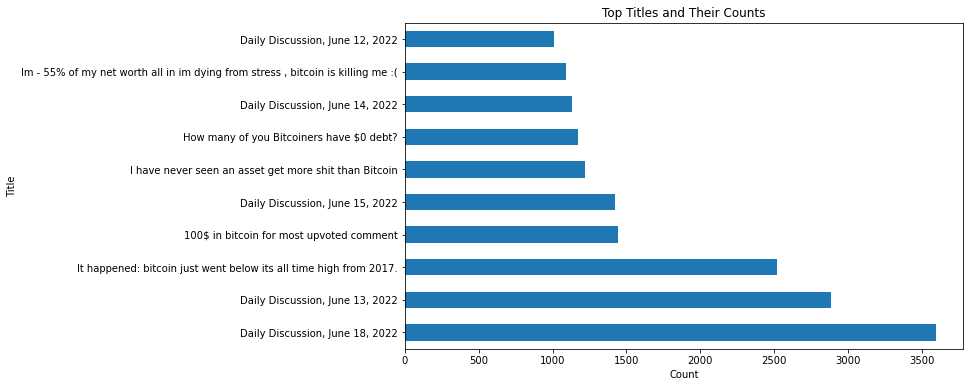

In [100]:
Title_unique = merged_df['title'].value_counts()

# Plot the unique title counts horizontally
plt.figure(figsize=(10, 6))
Title_unique[:10].plot(kind='barh')  # Use 'barh' for horizontal bar plot
plt.title('Top Titles and Their Counts')
plt.ylabel('Title')
plt.xlabel('Count')
plt.show()

In [101]:
from textblob import TextBlob

# Assuming df is your DataFrame
df['sentiment_score'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)